#### 1.) Edge: Expected Value

The notion of *edge* or *expected value* or *average performance* tells us something about the tendancy of a wealth path over time in games involving uncertainty

This is a particularly useful idea in games of chance and uncertainty including
- Roulette

- Blackjack

- Poker

- Trading

###### ______________________________________________________________________________________________________________________________________

##### Short Run vs. Long Run

Generally speaking, if our edge is positive we will accumulate wealth over a series of spins, hands, trades, or whatever one realized outcome is defined as

However, the results in the short run don't speak for the edge that is accumulated in the long run

##### **Q:** Which trader would you prefer to allocate capital to?

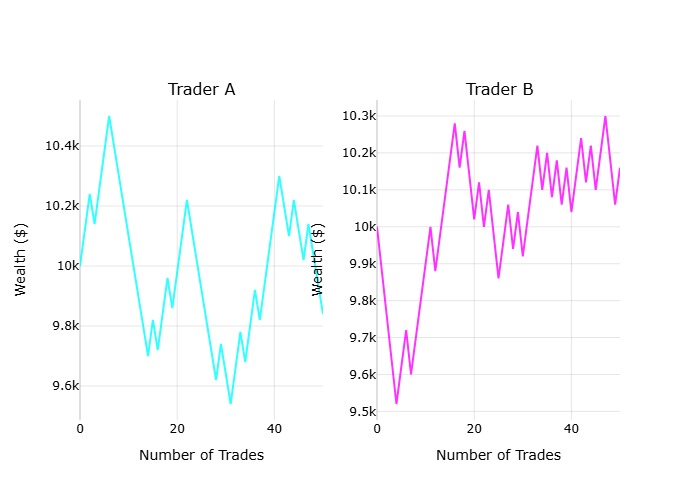

In [48]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Simulation parameters
n_steps = 50
starting_wealth = 10000

# Generate wealth paths
np.random.seed(40)

# Initialize wealth arrays
positive_ev = np.zeros(n_steps + 1)
negative_ev = np.zeros(n_steps + 1)
positive_ev[0] = starting_wealth
negative_ev[0] = starting_wealth

# Probability and payoff parameters
# Trader A (Positive EV)
p_win_a = 0.505
p_lose_a = 1 - p_win_a
avg_win_a = 120
avg_loss_a = 100
edge_a = (p_win_a * avg_win_a) - (p_lose_a * avg_loss_a)  # Positive edge

# Trader B (Negative EV)
p_win_b = 19/38
p_lose_b = 1 - p_win_b
avg_win_b = 100
avg_loss_b = 120
edge_b = (p_win_b * avg_win_b) - (p_lose_b * avg_loss_b)  # Negative edge

# Generate all random outcomes at once
positive_outcomes = np.random.random(n_steps)
negative_outcomes = np.random.random(n_steps)

# Simulate steps
for i in range(n_steps):
    # Simulate Trader A (Positive EV) results
    result_positive = positive_outcomes[i] < p_win_a
    net_result_positive = avg_win_a if result_positive else -avg_loss_a
    positive_ev[i+1] = positive_ev[i] + net_result_positive
    
    # Simulate Trader B (Negative EV) results
    result_negative = negative_outcomes[i] < p_win_b
    net_result_negative = avg_win_b if result_negative else -avg_loss_b
    negative_ev[i+1] = negative_ev[i] + net_result_negative

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(f'Trader A', f'Trader B')
)

# Add trace for Positive EV
x_vals = np.arange(n_steps + 1)
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=positive_ev,
        mode='lines',
        line=dict(color='rgba(0, 255, 255, 0.8)', width=2),
        showlegend=False
    ),
    row=1, col=1
)

# Add trace for Negative EV
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=negative_ev,
        mode='lines',
        line=dict(color='rgba(255, 0, 255, 0.8)', width=2),
        showlegend=False
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1300,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black')
)

# Update axes
for i in range(1, 3):
    fig.update_xaxes(
        title='Number of Trades',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Wealth ($)',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )

fig.show("png")

##### **A:** We haven't observed enough trades to determine if there is convergence or stability in the wealth path to the accumulation of some positive edge

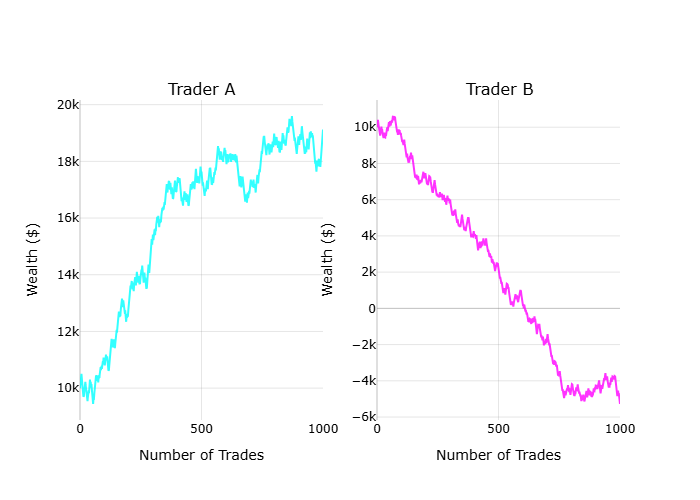

In [50]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Simulation parameters
n_steps = 1000
starting_wealth = 10000

# Generate wealth paths
np.random.seed(40)

# Initialize wealth arrays
positive_ev = np.zeros(n_steps + 1)
negative_ev = np.zeros(n_steps + 1)
positive_ev[0] = starting_wealth
negative_ev[0] = starting_wealth

# Probability and payoff parameters
# Trader A (Positive EV)
p_win_a = 0.505
p_lose_a = 1 - p_win_a
avg_win_a = 120
avg_loss_a = 100
edge_a = (p_win_a * avg_win_a) - (p_lose_a * avg_loss_a)  # Positive edge

# Trader B (Negative EV)
p_win_b = 19/38
p_lose_b = 1 - p_win_b
avg_win_b = 100
avg_loss_b = 120
edge_b = (p_win_b * avg_win_b) - (p_lose_b * avg_loss_b)  # Negative edge

# Generate all random outcomes at once
positive_outcomes = np.random.random(n_steps)
negative_outcomes = np.random.random(n_steps)

# Simulate steps
for i in range(n_steps):
    # Simulate Trader A (Positive EV) results
    result_positive = positive_outcomes[i] < p_win_a
    net_result_positive = avg_win_a if result_positive else -avg_loss_a
    positive_ev[i+1] = positive_ev[i] + net_result_positive
    
    # Simulate Trader B (Negative EV) results
    result_negative = negative_outcomes[i] < p_win_b
    net_result_negative = avg_win_b if result_negative else -avg_loss_b
    negative_ev[i+1] = negative_ev[i] + net_result_negative

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(f'Trader A', f'Trader B')
)

# Add trace for Positive EV
x_vals = np.arange(n_steps + 1)
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=positive_ev,
        mode='lines',
        line=dict(color='rgba(0, 255, 255, 0.8)', width=2),
        showlegend=False
    ),
    row=1, col=1
)

# Add trace for Negative EV
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=negative_ev,
        mode='lines',
        line=dict(color='rgba(255, 0, 255, 0.8)', width=2),
        showlegend=False
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1300,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black')
)

# Update axes
for i in range(1, 3):
    fig.update_xaxes(
        title='Number of Trades',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Wealth ($)',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )

fig.show("png")

###### ______________________________________________________________________________________________________________________________________

##### Fixed Edges and Games of Chance

Edge, or expected value (EV), is easily computed when the likelihoods of different outcomes are **well-defined and stable**

$$\mathbb{E}[X] = \sum_{i=1}^n x_i P(X=x_i) \quad \text{ or } \quad \mathbb{E}[X] = \int_{-\infty}^{\infty} x f(x) dx$$

Where $X$ is the outcome of one game, hand, trade, . . .
- $x_i$: one possible outcome
- $P(X=x_i)$: probability of outcome $x_i$

###### ______________________________________________________________________________________________________________________________________

##### **Example:** Edge in Roulette

Let $W$ be the event of winning and $L$ be the event of losing
By the law of total expectation:
$$\mathbb{E}[\text{Payoff}] = \mathbb{E}[\text{Payoff}|W]P(W) + \mathbb{E}[\text{Payoff}|L]P(L)$$


$$\mathbb{E}[\text{Player Wealth Per Play}] = (1)(18/38) + (-1)(20/38) = -0.0526 \implies \mathbb{E}[\text{Casino Wealth Per Play}] = 0.0526$$

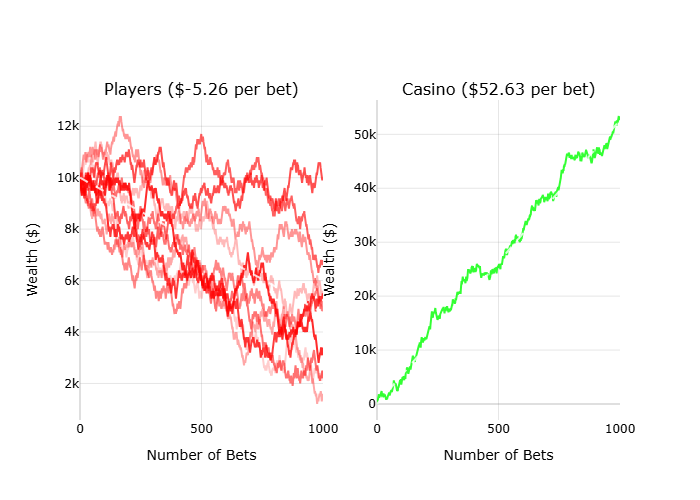

In [53]:
# Simulation parameters
n_steps = 1000
starting_wealth = 10000
n_players = 10

# Initialize arrays
players = np.zeros((n_players, n_steps + 1))
players[:, 0] = starting_wealth
casino = np.zeros(n_steps + 1)
casino[0] = 0  # Casino starts at 0

# Roulette parameters
p_win = 18/38  # Probability of winning betting on black
bet_size = 100  # Fixed bet size
win_amount = bet_size
loss_amount = bet_size

# Calculate expected value per bet
ev_per_bet = p_win * win_amount - (1-p_win) * loss_amount  # Player's EV
casino_ev_per_bet = -ev_per_bet * n_players  # Casino's EV (scaled by number of players)

# Generate random outcomes
outcomes = np.random.random((n_players, n_steps))

# Track which players are still playing
active_players = np.ones(n_players, dtype=bool)

# Simulate steps
for i in range(n_steps):
    # For each player still in the game
    for p in range(n_players):
        if active_players[p] and players[p, i] >= bet_size:
            # Determine if player wins or loses
            result = outcomes[p, i] < p_win
            
            # Update player wealth
            players[p, i+1] = players[p, i] + (win_amount if result else -loss_amount)
            
            # Update casino wealth (opposite of player)
            casino[i+1] += (-win_amount if result else loss_amount)
        else:
            # Player is bankrupt or inactive
            active_players[p] = False
            players[p, i+1] = players[p, i]
            
    # Carry over casino wealth
    if i > 0:
        casino[i+1] += casino[i]

# Calculate theoretical edge lines
x_vals = np.arange(n_steps + 1)
theoretical_player_edge = starting_wealth + ev_per_bet * x_vals
theoretical_casino_edge = casino_ev_per_bet * x_vals

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        f'Players (${ev_per_bet:.2f} per bet)', 
        f'Casino (${casino_ev_per_bet:.2f} per bet)'
    )
)

# Add traces for players
for p in range(n_players):
    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=players[p],
            mode='lines',
            line=dict(
                color='rgba(255, 0, 0, {})'.format(0.2 + 0.7 * (p/n_players)),
                width=2
            ),
            showlegend=False
        ),
        row=1, col=1
    )

# Add theoretical edge line for players
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=theoretical_player_edge,
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.8)', width=2, dash='dash'),
        showlegend=False
    ),
    row=1, col=1
)

# Add trace for casino
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=casino,
        mode='lines',
        line=dict(color='rgba(0, 255, 0, 0.8)', width=2),
        showlegend=False
    ),
    row=1, col=2
)

# Add theoretical edge line for casino
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=theoretical_casino_edge,
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.8)', width=2, dash='dash'),
        showlegend=False
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1300,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black')
)

# Update axes
for i in range(1, 3):
    fig.update_xaxes(
        title='Number of Bets',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Wealth ($)',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )

fig.show("png")

**Important Notes**
- In zero sum games if someone wins, someone loses - this goes for edge too (hence the implication above)
- The system itself must be *ergodic* otherwise the time average won't converge to the ensemble average and our analysis may be incorrect
- Probabilities and payouts are *fixed* and **DO NOT** vary over time

**Remark:** This still holds if the probabilities and payouts vary over time, they just have to remain *defined*

###### ______________________________________________________________________________________________________________________________________

##### Dynamic Edge and Games of Incomplete Information

In games of chance like we've observed above, player action has no influence on the overall edge or expected value of the game

However, in games that have a *dynamic edge* the player's optimal or suboptimal action **CAN** easily influence their edge or expected value and overall wealth path

Effectively, edge or expected value is a function of *a given policy function* $\pi$ that dictates player action

$$\mathbb{E}^{\pi}[X] = \mathbb{E}^{\pi}[\text{Winner Payoff}] P(\text{Winner}) + \mathbb{E}^{\pi}[\text{Loser Payoff}]P(\text{Loser})$$

##### **Example:** Blackjack (21)

A simple card game that involves being dealt cards in succession to attempt to acheive a total of 21

If the player goes above 21 they bust and lose to the dealer

There is clearly a way to play optimally, in other words, a policy $\pi$ to learn to maximize player edge or expected value

**Let's observe two different policy functions for blackjack**

1.) $\pi_1$: Stay anytime we observe 16 or higher

2.) $\pi_2$: Stay anytime we observe 20 or higher

Players can optimize their edge by finding an optimal policy to decide when to take a card

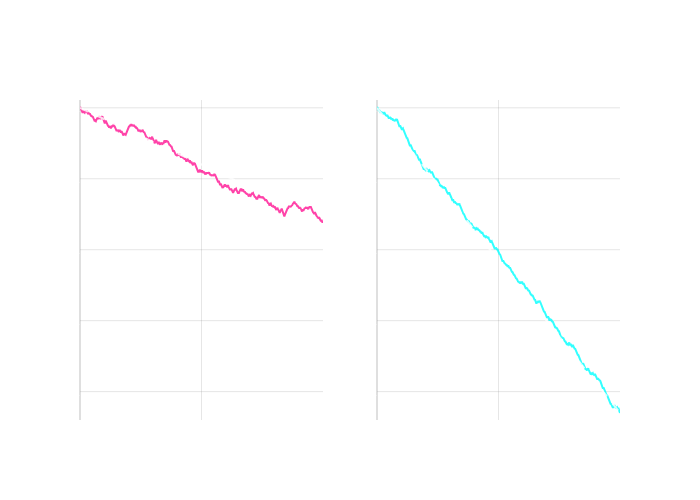

In [55]:
# Blackjack simulation parameters
n_hands = 1000
starting_wealth = 10000
bet_size = 10

# Initialize wealth arrays
wealth_stay16 = np.zeros(n_hands + 1)
wealth_stay16[0] = starting_wealth
wealth_hit20 = np.zeros(n_hands + 1) 
wealth_hit20[0] = starting_wealth

# Create a deck of cards
def create_deck():
    values = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
    suits = ['H','D','C','S']
    deck = [(v,s) for v in values for s in suits]
    np.random.shuffle(deck)
    return deck

# Get card value
def card_value(card):
    if card[0] in ['J','Q','K']:
        return 10
    elif card[0] == 'A':
        return 11
    else:
        return int(card[0])

# Calculate hand value (handling aces)
def hand_value(hand):
    value = 0
    aces = 0
    for card in hand:
        if card[0] == 'A':
            aces += 1
            value += 11
        else:
            value += card_value(card)
    
    while value > 21 and aces > 0:
        value -= 10
        aces -= 1
    
    return value

# Simulate one hand of blackjack with given strategy
def play_hand(deck, hit_until_20=False):
    if len(deck) < 4:  # Reshuffle if deck is low
        deck = create_deck()
    
    player_hand = [deck.pop(), deck.pop()]
    dealer_up_card = deck.pop()
    dealer_hole_card = deck.pop()
    
    # Player's turn - hit until threshold or bust
    if hit_until_20:
        # Hit until 20 strategy
        while hand_value(player_hand) < 20:
            if len(deck) < 1:
                deck = create_deck()
            player_hand.append(deck.pop())
    else:
        # Stay at 16 or higher strategy
        while hand_value(player_hand) < 16:
            if len(deck) < 1:
                deck = create_deck()
            player_hand.append(deck.pop())
    
    player_total = hand_value(player_hand)
    if player_total > 21:
        return False, deck
    
    # Dealer's turn
    dealer_hand = [dealer_up_card, dealer_hole_card]
    while hand_value(dealer_hand) < 17:
        if len(deck) < 1:
            deck = create_deck()
        dealer_hand.append(deck.pop())
    
    dealer_total = hand_value(dealer_hand)
    
    # Determine winner
    if dealer_total > 21:
        return True, deck  # Dealer busts
    return player_total > dealer_total, deck

# Simulate hands for both strategies
deck = create_deck()
outcomes_stay16 = []
outcomes_hit20 = []

for i in range(n_hands):
    # Stay at 16 strategy
    won_stay16, deck = play_hand(deck, hit_until_20=False)
    if won_stay16:
        wealth_stay16[i+1] = wealth_stay16[i] + bet_size
    else:
        wealth_stay16[i+1] = wealth_stay16[i] - bet_size
    outcomes_stay16.append(won_stay16)
    
    # Hit until 20 strategy
    won_hit20, deck = play_hand(deck, hit_until_20=True)
    if won_hit20:
        wealth_hit20[i+1] = wealth_hit20[i] + bet_size
    else:
        wealth_hit20[i+1] = wealth_hit20[i] - bet_size
    outcomes_hit20.append(won_hit20)

# Calculate actual win probabilities and expected values
win_prob_stay16 = np.mean(outcomes_stay16)
ev_stay16 = bet_size * (win_prob_stay16 - (1-win_prob_stay16))

win_prob_hit20 = np.mean(outcomes_hit20)
ev_hit20 = bet_size * (win_prob_hit20 - (1-win_prob_hit20))

# Create theoretical edge lines
x_vals = np.arange(n_hands + 1)
theoretical_edge_stay16 = starting_wealth + ev_stay16 * x_vals
theoretical_edge_hit20 = starting_wealth + ev_hit20 * x_vals

# Find overall y-axis range
y_min = min(min(wealth_stay16), min(wealth_hit20))
y_max = max(max(wealth_stay16), max(wealth_hit20))
y_range = [y_min - 100, y_max + 100]

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        f'Stay at 16+ Strategy (${ev_stay16:.2f}/hand)',
        f'Hit Until 20 Strategy (${ev_hit20:.2f}/hand)'
    )
)

# Add traces for stay16 strategy
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=wealth_stay16,
        mode='lines',
        line=dict(color='rgba(255, 20, 147, 0.8)', width=2),
        name='Wealth (Stay 16+)'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=theoretical_edge_stay16,
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.8)', width=2, dash='dash'),
        name='Expected Value (Stay 16+)'
    ),
    row=1, col=1
)

# Add traces for hit20 strategy
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=wealth_hit20,
        mode='lines',
        line=dict(color='rgba(0, 255, 255, 0.8)', width=2),
        name='Wealth (Hit Until 20)'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=theoretical_edge_hit20,
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.8)', width=2, dash='dash'),
        name='Expected Value (Hit Until 20)'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1300,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
for i in [1, 2]:
    fig.update_xaxes(
        title='Number of Hands',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Wealth ($)' if i == 1 else '',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        range=y_range,  # Set same y-axis range for both plots
        row=1, col=i
    )

fig.show("png")


##### $$\mathbb{E}^{\pi_1}[\text{Blackjack Hand}] \approx -\$1.75 \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \mathbb{E}^{\pi_2}[\text{Blackjack Hand}] \approx -\$4.25$$

Wow!  We can see that the even though the game is *uncertain* and information is *incomplete* our action influences our overall wealth path!

Effectively, this shows that we can *learn* to play games of incomplete information (Blackjack, Poker, Trading)

**Remark:** Just because we can learn an optimal policy **IT DOES NOT MEAN** we can learn one that has positive expected value

Important Notes on Dynamic Edge
- Probabilities of outcomes are not necessarily fixed (particularly true for poker and trading)

###### ______________________________________________________________________________________________________________________________________


##### Though Fixed Negative Edges Imply Players ALWAYS Lose - The Only Thing They Control (Bet Size) Can Actually Make Their Plays +EV!

A crazy notion - it is literally the only thing a player can control and they can optimize a policy for it.

A casino will never actually let this happen. . .

###### ______________________________________________________________________________________________________________________________________


##### Examples of Optimal Policies in Casino Games

##### **Example:** Martingaling Roulette

 $$\mathbb{E}^{\pi_{roulette}}[\text{Wealth}] = \frac{18}{37} \cdot W_t + \frac{19}{37} \cdot (W_t - 1) = W_t - \frac{1}{37} \approx W_t - 2.7\%$$

 $$\mathbb{E}^{\pi_{martingale}}[\text{Wealth}] = \frac{18}{37} \cdot (W_t + 1) + \frac{19}{37} \cdot (W_t - 1 - 2 - 4 - ... - 2^n) = W_t + 1$$

*European Odds*

 The martingale strategy appears to guarantee a profit of $1 by doubling bets after each loss. However, this requires infinite wealth and no table limits.



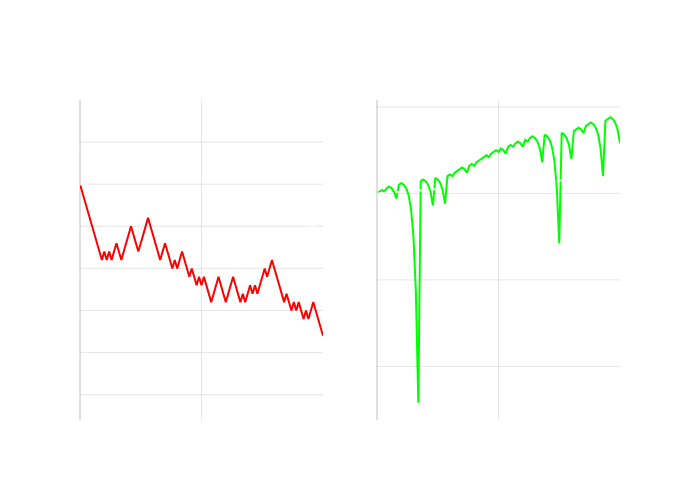

In [59]:
# Roulette simulation parameters
n_plays = 100
starting_wealth = 10000
base_bet = 10

# Initialize wealth arrays
wealth_normal = np.zeros(n_plays + 1)
wealth_normal[0] = starting_wealth
wealth_martingale = np.zeros(n_plays + 1)
wealth_martingale[0] = starting_wealth

# Simulate normal roulette strategy
current_bet = base_bet
for i in range(n_plays):
    # 18/38 chance of winning on red/black bet in American roulette (0 and 00)
    won = np.random.random() < (18/38)
    if won:
        wealth_normal[i+1] = wealth_normal[i] + current_bet
    else:
        wealth_normal[i+1] = wealth_normal[i] - current_bet

# Simulate martingale strategy
current_bet = base_bet
for i in range(n_plays):
    won = np.random.random() < (18/38)
    if won:
        wealth_martingale[i+1] = wealth_martingale[i] + current_bet
        current_bet = base_bet
    else:
        wealth_martingale[i+1] = wealth_martingale[i] - current_bet
        current_bet *= 2

# Calculate theoretical edges
x_vals = np.arange(n_plays + 1)
ev_per_play = base_bet * ((18/38) - (20/38))  # -0.0526 per unit bet
theoretical_edge_normal = starting_wealth + ev_per_play * x_vals
theoretical_edge_martingale = starting_wealth + x_vals  # +1 per play

# Find y-axis ranges for each plot separately
y_min_normal = min(min(wealth_normal), min(theoretical_edge_normal))
y_max_normal = max(max(wealth_normal), max(theoretical_edge_normal))
y_range_normal = [y_min_normal - 100, y_max_normal + 100]

y_min_martingale = min(min(wealth_martingale), min(theoretical_edge_martingale))
y_max_martingale = max(max(wealth_martingale), max(theoretical_edge_martingale))
y_range_martingale = [y_min_martingale - 100, y_max_martingale + 100]

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        f'Normal Roulette Strategy (${ev_per_play:.2f}/play)',
        'Martingale Strategy (+$1/play)'
    )
)

# Add traces for normal strategy
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=wealth_normal,
        mode='lines',
        line=dict(color='rgba(255, 0, 0, 1)', width=2),
        name='Wealth (Normal)'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=theoretical_edge_normal,
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.8)', width=2, dash='dash'),
        name='Expected Value (Normal)'
    ),
    row=1, col=1
)

# Add traces for martingale strategy
fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=wealth_martingale,
        mode='lines',
        line=dict(color='rgba(0, 255, 0, 1)', width=2),
        name='Wealth (Martingale)'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=x_vals,
        y=theoretical_edge_martingale,
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.8)', width=2, dash='dash'),
        name='Expected Value (Martingale)'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=1300,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
for i in [1, 2]:
    fig.update_xaxes(
        title='Number of Plays',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Wealth ($)' if i == 1 else '',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        range=y_range_normal if i == 1 else y_range_martingale,
        row=1, col=i
    )

fig.show("png")


##### $$\mathbb{E}^{\pi_1}[\text{Roulette Spin}] \approx -\$0.526 \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \mathbb{E}^{\pi_2}[\text{Roulette Spin}] \approx \$10$$

**Remark:** Casinos will never let you martingale roulette, there are table limits so you can't recover massive losses on a swing back up

###### ______________________________________________________________________________________________________________________________________


##### **Example:** Optimal Blackjack Policy by Counting Cards

Card counting effectively involves keeping track of remaining cards in a blackjack shoe to increase bets and change play when it is optimal for the player

Casinos counter this by reshuffling early, changing rules, restricting spreads, asking counters to leave or by banning them

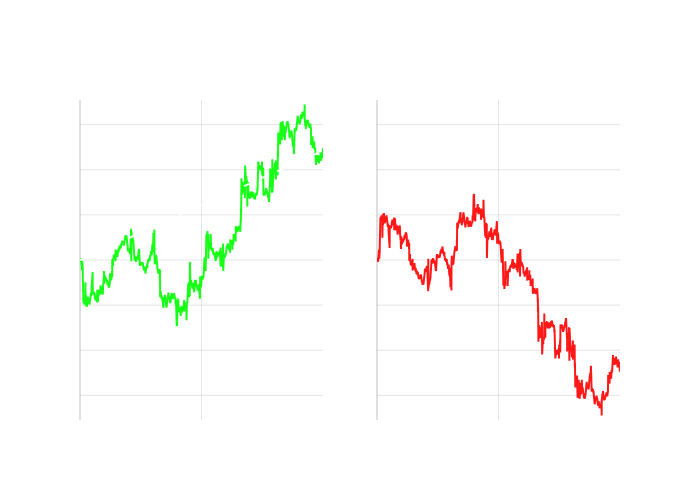

Hands: 10000
Total profit: $2425.00
Total wagered: $193860.00
EV per hand: $0.24
Player edge: 1.251%
W/P/L: 4491/861/4941


In [61]:
import random
from collections import deque
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# =============================
# Config
# =============================
N_HANDS = 10000
STARTING_BANKROLL = 10_000
UNIT = 10                 # table min
MIN_BET = UNIT
MAX_BET = 120             # ~1–12 spread
N_DECKS = 6
PENETRATION = 0.83        # reshuffle at 83% dealt
BLACKJACK_PAYS = 1.5      # 3:2
DEALER_HITS_SOFT_17 = False  # S17
ALLOW_DAS = True
MAX_SPLITS = 3            # up to 4 hands
INSURANCE_TC = 3          # take insurance at TC >= +3 (dealer shows Ace)
RNG_SEED = 42             # set to None for fully random

# Card model
RANKS = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']
SUITS = ['♠','♥','♦','♣']
HI_LO = {'2':1,'3':1,'4':1,'5':1,'6':1,'7':0,'8':0,'9':0,'10':-1,'J':-1,'Q':-1,'K':-1,'A':-1}

# =============================
# Helpers
# =============================
def create_deck():
    return [(r,s) for r in RANKS for s in SUITS]

def create_shoe(n_decks):
    cards = create_deck() * n_decks
    random.shuffle(cards)
    return deque(cards)

def tag(card):  # Hi-Lo tag
    return HI_LO[card[0]]

def total_and_soft(hand):
    total = 0
    aces = 0
    for r,_ in hand:
        if r in ['10','J','Q','K']:
            total += 10
        elif r == 'A':
            total += 11
            aces += 1
        else:
            total += int(r)
    while total > 21 and aces:
        total -= 10
        aces -= 1
    return total, (aces > 0)

def is_blackjack(hand):
    if len(hand) != 2: return False
    ranks = [hand[0][0], hand[1][0]]
    return ('A' in ranks) and any(r in ['10','J','Q','K'] for r in ranks)

def pair_rank(hand):
    return hand[0][0] if len(hand) == 2 and hand[0][0] == hand[1][0] else None

def can_double(hand):
    return len(hand) == 2

# =============================
# Basic strategy (S17, DAS) — simplified, reasonable
# =============================
def split_decision(hand, dealer_up):
    pr = pair_rank(hand)
    if not pr: return False
    up = dealer_up[0]
    if pr in ['A','8']: return True
    if pr == '10': return False
    if pr == '9': return up not in ['7','10','J','Q','K','A']
    if pr == '7': return up in ['2','3','4','5','6','7']
    if pr == '6': return up in ['2','3','4','5','6']
    if pr == '5': return False
    if pr == '4': return ALLOW_DAS and up in ['5','6']
    if pr in ['2','3']: return up in ['2','3','4','5','6','7']
    return False

def soft_action(hand, dealer_up):
    total, soft = total_and_soft(hand)
    up = dealer_up[0]
    # Return 'H','S','D'
    if total <= 17:
        if up in ['4','5','6'] and can_double(hand): return 'D'
        return 'H'
    if total == 18:
        if up in ['2','3','4','5','6'] and can_double(hand): return 'D'
        if up in ['9','10','J','Q','K','A']: return 'H'
        return 'S'
    return 'S'  # 19+

def hard_action(hand, dealer_up):
    total, soft = total_and_soft(hand)
    up = dealer_up[0]
    if total <= 8: return 'H'
    if total == 9:
        if up in ['3','4','5','6'] and can_double(hand): return 'D'
        return 'H'
    if total == 10:
        if up not in ['10','J','Q','K','A'] and can_double(hand): return 'D'
        return 'H'
    if total == 11:
        if can_double(hand): return 'D'
        return 'H'
    if total == 12:
        return 'S' if up in ['4','5','6'] else 'H'
    if 13 <= total <= 16:
        return 'S' if up in ['2','3','4','5','6'] else 'H'
    return 'S'  # 17+

def player_action(hand, dealer_up):
    t, soft = total_and_soft(hand)
    if pair_rank(hand):
        return 'SP' if split_decision(hand, dealer_up) else (soft_action(hand, dealer_up) if soft else hard_action(hand, dealer_up))
    if soft and t <= 21:
        return soft_action(hand, dealer_up)
    return hard_action(hand, dealer_up)

# =============================
# Betting ramp by True Count (floor)
# =============================
def bet_from_tc(tc):
    t = int(np.floor(tc))
    if t <= 0: return MIN_BET
    if t == 1: return MIN_BET
    if t == 2: return min(MAX_BET, 2*UNIT)
    if t == 3: return min(MAX_BET, 4*UNIT)
    if t == 4: return min(MAX_BET, 6*UNIT)
    return MAX_BET  # t >= 5

# =============================
# Simulation
# =============================
def simulate():
    if RNG_SEED is not None:
        random.seed(RNG_SEED)

    shoe = create_shoe(N_DECKS)
    cards_in_shoe = 52 * N_DECKS
    cut_point = int((1 - PENETRATION) * cards_in_shoe)

    running = 0
    tc_for_next_bet = 0.0

    bankroll = STARTING_BANKROLL
    bankroll_path = [bankroll]
    casino_bankroll = STARTING_BANKROLL
    casino_path = [casino_bankroll]

    total_profit = 0.0
    total_wagered = 0.0
    wins = losses = pushes = 0

    def reshuffle():
        nonlocal shoe, running, tc_for_next_bet
        shoe = create_shoe(N_DECKS)
        running = 0
        tc_for_next_bet = 0.0

    for hand_idx in range(N_HANDS):
        if len(shoe) <= cut_point:
            reshuffle()

        bet = bet_from_tc(tc_for_next_bet)
        round_profit = 0.0
        round_action = 0.0  # action (for EV per wager)

        # Deal
        player_hands = [[shoe.pop(), shoe.pop()]]
        dealer_up = shoe.pop()
        dealer_hole = shoe.pop()

        # Count exposed: player two + dealer up (NOT the hole)
        running += tag(player_hands[0][0]) + tag(player_hands[0][1]) + tag(dealer_up)

        # Insurance option
        took_insurance = False
        insurance_bet = 0.0
        if dealer_up[0] == 'A' and bet > 0 and np.floor(tc_for_next_bet) >= INSURANCE_TC:
            took_insurance = True
            insurance_bet = 0.5 * bet

        # Dealer peek (for 10 or A upcard)
        dealer_has_bj = False
        if dealer_up[0] in ['A','10','J','Q','K']:
            if is_blackjack([dealer_up, dealer_hole]):
                dealer_has_bj = True
                # Only now the hole is exposed → count it
                running += tag(dealer_hole)

        player_natural = is_blackjack(player_hands[0])

        if dealer_has_bj:
            # Settle insurance
            if took_insurance:
                # Insurance wins 2:1 on insurance_bet (profit = +2*insurance_bet)
                # Note: we add only profit. Action includes the insurance bet itself.
                round_profit += 2.0 * insurance_bet
                round_action += insurance_bet
            # Main hand
            if player_natural:
                pushes += 1  # push on naturals vs dealer BJ
                # no main bet action (still counts as action below if we include it)
                round_action += bet
            else:
                losses += 1
                round_profit -= bet
                round_action += bet
        else:
            # Dealer has no blackjack (if peeked), hole is still unknown (not counted yet)
            # If player has natural: pay immediately 3:2
            if player_natural:
                wins += 1
                round_profit += bet * BLACKJACK_PAYS
                round_action += bet
                # Insurance (if taken) loses here:
                if took_insurance:
                    round_profit -= insurance_bet
                    round_action += insurance_bet
            else:
                # Play hands (splits & doubles)
                bets_for_hands = [bet]
                hand_ptr = 0
                splits_done = 0

                while hand_ptr < len(player_hands):
                    hand = player_hands[hand_ptr]
                    hand_bet = bets_for_hands[hand_ptr]

                    # Handle pair splits (respect max splits, split Aces one card only)
                    act = player_action(hand, dealer_up)
                    if act == 'SP' and splits_done < MAX_SPLITS:
                        # perform split
                        a = hand.pop()
                        b = hand.pop()
                        hand1 = [a]
                        hand2 = [b]
                        # draw one card to each
                        c1 = shoe.pop(); hand1.append(c1); running += tag(c1)
                        c2 = shoe.pop(); hand2.append(c2); running += tag(c2)

                        player_hands[hand_ptr] = hand1
                        bets_for_hands[hand_ptr] = hand_bet
                        player_hands.insert(hand_ptr+1, hand2)
                        bets_for_hands.insert(hand_ptr+1, hand_bet)
                        splits_done += 1

                        # Split Aces: one card only; lock the hand (no further action)
                        # We'll enforce by skipping action loop for those hands later
                        # (we just don't hit/double further if starting card is Ace)
                        # Continue to next hand after relabel
                        # Don't increment pointer yet; we need to process current 'hand_ptr' after split
                        pass
                    else:
                        # Normal play for this hand
                        # If split Aces → one card only, stand
                        if hand[0][0] == 'A' and len(hand) == 2 and pair_rank([hand[0],hand[0]]) == 'A':
                            # already has only one added card, stand
                            pass
                        else:
                            while True:
                                act_now = player_action(hand, dealer_up)
                                if act_now == 'D' and can_double(hand):
                                    # Double: take one card and stop
                                    extra_card = shoe.pop(); hand.append(extra_card); running += tag(extra_card)
                                    bets_for_hands[hand_ptr] = 2 * hand_bet
                                    hand_bet = bets_for_hands[hand_ptr]
                                    break
                                elif act_now == 'H':
                                    card = shoe.pop(); hand.append(card); running += tag(card)
                                    t,_ = total_and_soft(hand)
                                    if t >= 21: break
                                else:
                                    # Stand
                                    break
                        # Save & advance
                        player_hands[hand_ptr] = hand
                        hand_ptr += 1

                # Reveal dealer hole card now; count it
                running += tag(dealer_hole)
                dealer = [dealer_up, dealer_hole]

                # Dealer play
                while True:
                    dtotal, dsoft = total_and_soft(dealer)
                    if dtotal > 17: break
                    if dtotal == 17 and not DEALER_HITS_SOFT_17: break
                    if dtotal == 17 and DEALER_HITS_SOFT_17 and not dsoft: break
                    card = shoe.pop(); dealer.append(card); running += tag(card)

                dtotal,_ = total_and_soft(dealer)

                # Resolve hands
                for idx, hand in enumerate(player_hands):
                    hb = bets_for_hands[idx]
                    ptotal,_ = total_and_soft(hand)
                    round_action += hb
                    if ptotal > 21:
                        losses += 1
                        round_profit -= hb
                    elif dtotal > 21 or ptotal > dtotal:
                        wins += 1
                        round_profit += hb
                    elif ptotal < dtotal:
                        losses += 1
                        round_profit -= hb
                    else:
                        pushes += 1

                # Insurance loses (since dealer doesn't have BJ)
                if took_insurance:
                    round_profit -= insurance_bet
                    round_action += insurance_bet

        # Finalize round
        bankroll += round_profit
        bankroll_path.append(bankroll)
        casino_bankroll -= round_profit
        casino_path.append(casino_bankroll)

        total_profit += round_profit
        total_wagered += round_action

        # True count for next hand (use decks remaining AFTER this round)
        decks_remaining = max(1e-9, len(shoe)/52.0)
        tc_for_next_bet = running / decks_remaining

    # Metrics
    ev_per_hand = total_profit / N_HANDS
    edge_pct = (total_profit / total_wagered * 100.0) if total_wagered > 0 else 0.0

    return {
        "bankroll_path": bankroll_path,
        "casino_path": casino_path,
        "total_profit": total_profit,
        "total_wagered": total_wagered,
        "ev_per_hand": ev_per_hand,
        "edge_pct": edge_pct,
        "wins": wins, "losses": losses, "pushes": pushes
    }

# =============================
# Run and Plot
# =============================
res = simulate()

x = np.arange(len(res["bankroll_path"]))
theoretical = STARTING_BANKROLL + res["ev_per_hand"] * x

y_min = min(min(res["bankroll_path"]), min(res["casino_path"]))
y_max = max(max(res["bankroll_path"]), max(res["casino_path"]))
y_range = [y_min - 100, y_max + 100]

subtitle_left = (
    f'Card Counter (EV ${res["ev_per_hand"]:.2f}/hand, Edge {res["edge_pct"]:.2f}%)'
)

fig = make_subplots(rows=1, cols=2, subplot_titles=(subtitle_left, 'Casino Wealth'))
fig.add_trace(go.Scatter(x=x, y=res["bankroll_path"], mode='lines',
                         line=dict(color='rgba(0,255,0,0.9)', width=2), name='Player Wealth'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=theoretical, mode='lines',
                         line=dict(color='rgba(255,255,255,0.9)', width=2, dash='dash'),
                         name='EV Line'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=res["casino_path"], mode='lines',
                         line=dict(color='rgba(255,0,0,0.9)', width=2), name='Casino Wealth'), row=1, col=2)

fig.update_layout(height=520, width=1300, showlegend=False,
                  plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)',
                  font=dict(color='white'))

for i in [1,2]:
    fig.update_xaxes(title='Number of Hands', showgrid=True, gridwidth=1,
                     gridcolor='rgba(128,128,128,0.2)', zeroline=True, zerolinewidth=1,
                     zerolinecolor='rgba(128,128,128,0.5)', row=1, col=i)
    fig.update_yaxes(title='Wealth ($)' if i==1 else '', showgrid=True, gridwidth=1,
                     gridcolor='rgba(128,128,128,0.2)', zeroline=True, zerolinewidth=1,
                     zerolinecolor='rgba(128,128,128,0.5)', range=y_range, row=1, col=i)

fig.show("png")

print(f"Hands: {N_HANDS}")
print(f"Total profit: ${res['total_profit']:.2f}")
print(f"Total wagered: ${res['total_wagered']:.2f}")
print(f"EV per hand: ${res['ev_per_hand']:.2f}")
print(f"Player edge: {res['edge_pct']:.3f}%")
print(f"W/P/L: {res['wins']}/{res['pushes']}/{res['losses']}")


**Be the Casino:** In any case - the goal of players in games of incomplete information with a dynamic edge is to *be the casino* that is to operate ($\pi$) with positive expected value and to do this over a *large number of* plays, hands, or trades to accumulate wealth. . .you should be eager to continue to trade if you have an effective policy because you will be accumulating more wealth the more you trade - if it is ineffective or luck then every trade is a roll of the dice.

---

#### 2.) Poker & Trading

##### Learning to Play Poker and Trade

We've observed above how policies $\pi_i$ impact the edge or expected value of our game and influence the trajectory of our wealth path

In machine learning and artificial intelligence (reinforcement learning) we teach agents to learn to interact with an environment by optimizing for *expected value*

In other words, agents learn by *experiencing* and *acting* in their environment according to some policy $\pi$ and they will receive a reward dictated by a reward function 

The goal of reinforcement learning is to find an optimal policy $\pi^*$ that maximizes expected value:
 
 $$\pi^* = \underset{\pi}{\text{argmax}} \; \mathbb{E}_{\pi}[R]$$
 
where $R$ represents the cumulative reward received by following policy $\pi$


This is the math behind showing how an ML/AI/RL agent can *learn* to play Roulette, Blackjack, Poker, and Trade

**Example:**  Learning a Basic Policy $\pi^* = \underset{\pi}{\text{argmax}} \; \mathbb{E}_{\pi}[R]$ for Blackjack

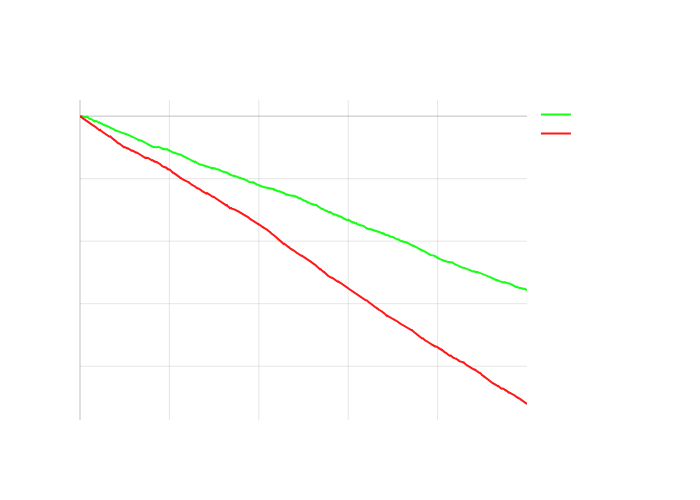

In [62]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Simple blackjack environment
class BlackjackEnv:
    def __init__(self):
        self.deck = list(range(2,12))*4  # 2-10, 11(Ace)
        
    def deal(self):
        return np.random.choice(self.deck)
    
    def play_hand(self, policy):
        player_hand = [self.deal(), self.deal()]
        dealer_up = self.deal()
        
        # Player's turn
        while sum(player_hand) < 21:
            if policy(sum(player_hand), dealer_up):
                player_hand.append(self.deal())
            else:
                break
                
        player_sum = sum(player_hand)
        if player_sum > 21:
            return -1  # Bust
            
        # Dealer's turn
        dealer_hand = [dealer_up, self.deal()]
        while sum(dealer_hand) < 17:
            dealer_hand.append(self.deal())
            
        dealer_sum = sum(dealer_hand)
        if dealer_sum > 21:
            return 1  # Dealer bust
        
        if player_sum > dealer_sum:
            return 1
        elif player_sum < dealer_sum:
            return -1
        return 0  # Push

# Q-learning agent
class QLearningAgent:
    def __init__(self):
        self.q_table = {}
        self.epsilon = 0.1
        self.alpha = 0.1
        
    def get_action(self, player_sum, dealer_up):
        state = (player_sum, dealer_up)
        if state not in self.q_table:
            self.q_table[state] = {0: 0, 1: 0}  # Stay: 0, Hit: 1
            
        if np.random.random() < self.epsilon:
            return np.random.choice([0,1])
        
        return max(self.q_table[state], key=self.q_table[state].get)
        
    def update(self, state, action, reward):
        if state not in self.q_table:
            self.q_table[state] = {0: 0, 1: 0}
        
        self.q_table[state][action] = (1-self.alpha) * self.q_table[state][action] + self.alpha * reward

# Training
env = BlackjackEnv()
agent = QLearningAgent()
naive_wealth = [0]
agent_wealth = [0]
n_episodes = 10000

# Naive policy - hit until 20
def naive_policy(player_sum, dealer_up):
    return player_sum < 20

# Training loop
for episode in range(n_episodes):
    # Naive strategy
    naive_reward = env.play_hand(naive_policy)
    naive_wealth.append(naive_wealth[-1] + naive_reward)
    
    # Q-learning agent
    player_sum = [env.deal(), env.deal()]
    dealer_up = env.deal()
    
    while sum(player_sum) < 21:
        state = (sum(player_sum), dealer_up)
        action = agent.get_action(sum(player_sum), dealer_up)
        
        if action == 0:  # Stay
            break
        player_sum.append(env.deal())
    
    reward = env.play_hand(lambda x,y: False)  # Just to get the outcome
    agent.update(state, action, reward)
    agent_wealth.append(agent_wealth[-1] + reward)

# Create figure
fig = make_subplots(rows=1, cols=1)

# Add traces
fig.add_trace(
    go.Scatter(x=list(range(n_episodes+1)), y=agent_wealth, 
               name='Q-Learning Agent',
               line=dict(color='rgba(0,255,0,0.9)', width=2))
)

fig.add_trace(
    go.Scatter(x=list(range(n_episodes+1)), y=naive_wealth,
               name='Naive Strategy',
               line=dict(color='rgba(255,0,0,0.9)', width=2))
)

# Update layout
fig.update_layout(
    height=520,
    width=1300,
    title='Wealth Paths: Q-Learning vs Naive Strategy in Blackjack',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
fig.update_xaxes(
    title='Episodes',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

fig.update_yaxes(
    title='Cumulative Reward',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

fig.show("png")


###### ______________________________________________________________________________________________________________________________________

##### Example: Hand of Poker (Pocket Aces)

Suppose we were playing poker and you had pocket aces, let's consider the conditional and unconditional probabilities of winning against 5 other players

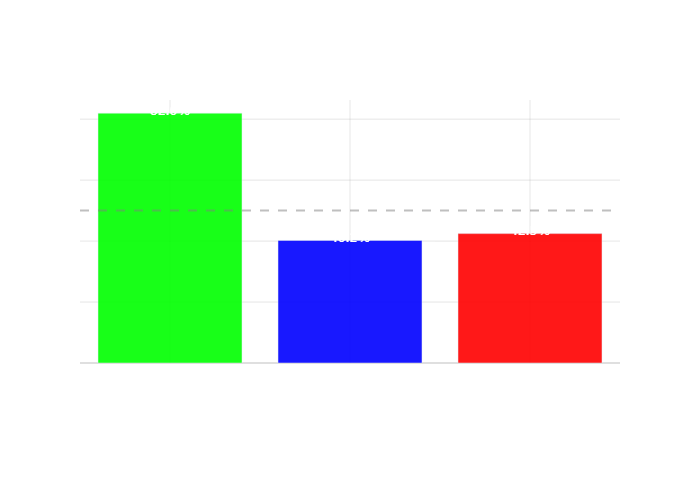

In [63]:
import deuces
from deuces import Card, Evaluator, Deck
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize evaluator
evaluator = Evaluator()

def simulate_poker_hands(n_hands=10000, n_opponents=5):
    trips_wins = []
    non_trips_wins = []
    trips_flush_wins = []
    trips_hands = 0
    non_trips_hands = 0
    trips_flush_hands = 0
    
    # Pocket aces in binary format
    ace_spades = Card.new('As')
    ace_hearts = Card.new('Ah')
    pocket_aces = [ace_spades, ace_hearts]
    
    for _ in range(n_hands):
        deck = Deck()
        # Remove our pocket aces from deck
        deck.cards.remove(ace_spades)
        deck.cards.remove(ace_hearts)
        
        # Deal opponent cards
        villain_cards = []
        for _ in range(n_opponents):
            villain_cards.append(deck.draw(2))
            
        # Deal board
        board = deck.draw(5)
        
        # Check if we hit trips
        board_ranks = [Card.get_rank_int(card) for card in board]
        hit_trips = Card.get_rank_int(ace_spades) in board_ranks
        
        # Check if board has flush draw (4 cards of same suit)
        board_suits = [Card.get_suit_int(card) for card in board]
        suit_counts = {suit: board_suits.count(suit) for suit in set(board_suits)}
        has_flush_draw = max(suit_counts.values()) == 4
        
        # Evaluate all hands
        hero_score = evaluator.evaluate(board, pocket_aces)
        villain_scores = [evaluator.evaluate(board, v_cards) for v_cards in villain_cards]
        
        # Lower score is better in deuces
        won_hand = all(hero_score < v_score for v_score in villain_scores)
        
        if hit_trips and has_flush_draw:
            trips_flush_hands += 1
            trips_flush_wins.append(won_hand)
        elif hit_trips:
            trips_hands += 1
            trips_wins.append(won_hand)
        else:
            non_trips_hands += 1
            non_trips_wins.append(won_hand)
    
    trips_win_rate = sum(trips_wins) / trips_hands if trips_hands > 0 else 0
    non_trips_win_rate = sum(non_trips_wins) / non_trips_hands if non_trips_hands > 0 else 0
    trips_flush_win_rate = sum(trips_flush_wins) / trips_flush_hands if trips_flush_hands > 0 else 0
    
    return trips_win_rate, non_trips_win_rate, trips_flush_win_rate, trips_hands/n_hands, trips_flush_hands/n_hands

# Run simulation
trips_wr, non_trips_wr, trips_flush_wr, trips_freq, trips_flush_freq = simulate_poker_hands()

# Create figure
fig = make_subplots(rows=1, cols=1)

# Add bars
fig.add_trace(
    go.Bar(x=['Pocket Aces With Trips', 'Pocket Aces With Trips & Flush Draw', 'Pocket Aces Without Trips'], 
           y=[trips_wr, trips_flush_wr, non_trips_wr],
           marker_color=['rgba(0,255,0,0.9)', 'rgba(0,0,255,0.9)', 'rgba(255,0,0,0.9)'])
)

# Add horizontal line at 0.5
fig.add_hline(y=0.5, line_dash="dash", line_color="rgba(128,128,128,0.5)")

# Update layout
fig.update_layout(
    height=520,
    width=1300,
    title=f'Win Rates Against 5 Opponents (Trips Freq: {trips_freq:.2%}, Trips & Flush Draw Freq: {trips_flush_freq:.2%})',
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

# Update axes
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)
fig.update_yaxes(
    title='Win Rate',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

# Add text annotations
for i, v in enumerate([trips_wr, trips_flush_wr, non_trips_wr]):
    fig.add_annotation(
        x=i,
        y=v + 0.01,
        text=f'{v:.1%}',
        showarrow=False,
        font=dict(color='white')
    )

fig.show("png")


You should probably fold pocket aces over 50% of the time if you are playing 5 opponents here.  

How many new players know this?  I can tell them - but I can't sit there with them and walk through all these considerations. . .

**Considerations**
- When a board shows a flush draw - did my remaining opponents raise *correctly*?  Or do they not even know how to bluff?
- What is my overall bankroll?  Can I afford a swing if I think I'm more correct than raw probabilities imply?
- Where do I stand relative to my last few hands?  Am I trying to recover losses or playing wildly?
- *Who* am I playing with?  Do they understand the relative value of their position at any stage of the game? 

By experiencing this they *learn* a lot about the game and maximizing their EV

##### Effectively, Poker Players are Learning $\pi^* = \underset{\pi}{\text{argmax}} \; \mathbb{E}_{\pi}[R]$ where R is the Reward/Hand - Exactly What AI Agents Learn

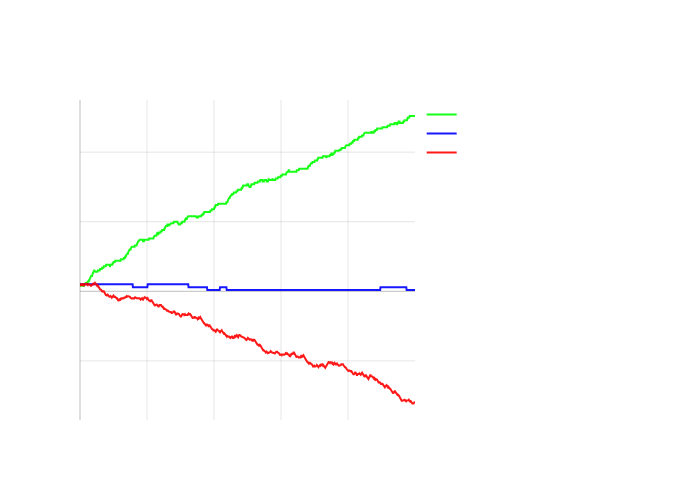

In [64]:
from deuces import Card, Evaluator, Deck
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize evaluator
evaluator = Evaluator()

def simulate_poker_hands(n_hands=1000):
    # Track wealth paths for different scenarios
    trips_wealth = [100]  # Starting with $100
    trips_flush_wealth = [100]
    non_trips_wealth = [100]
    
    # Pocket aces in binary format
    ace_spades = Card.new('As')
    ace_hearts = Card.new('Ah')
    pocket_aces = [ace_spades, ace_hearts]
    
    # Base bet size $10, increased for strong hands
    base_bet = 10
    trips_multiplier = 2  # Double bet for trips
    flush_multiplier = 2  # 50% increase for flush draw
    
    for _ in range(n_hands):
        deck = Deck()
        # Remove our pocket aces from deck
        deck.cards.remove(ace_spades)
        deck.cards.remove(ace_hearts)
        
        # Deal 5 opponents
        villain_cards = []
        for _ in range(5):
            villain_cards.append(deck.draw(2))
            
        # Deal board
        board = deck.draw(5)
        
        # Check if we hit trips
        board_ranks = [Card.get_rank_int(card) for card in board]
        hit_trips = Card.get_rank_int(ace_spades) in board_ranks
        
        # Check if board has flush draw
        board_suits = [Card.get_suit_int(card) for card in board]
        suit_counts = {suit: board_suits.count(suit) for suit in set(board_suits)}
        has_flush_draw = max(suit_counts.values()) == 4
        
        # Evaluate all hands
        hero_score = evaluator.evaluate(board, pocket_aces)
        villain_scores = [evaluator.evaluate(board, v_cards) for v_cards in villain_cards]
        
        # Lower score is better in deuces
        won_hand = all(hero_score < v_score for v_score in villain_scores)
        
        # Calculate bet size based on hand strength
        if hit_trips and has_flush_draw:
            bet_size = base_bet * trips_multiplier * flush_multiplier
        elif hit_trips:
            bet_size = base_bet * trips_multiplier
        else:
            bet_size = base_bet
            
        # Update wealth paths based on outcome
        if hit_trips and has_flush_draw:
            last_wealth = trips_flush_wealth[-1]
            trips_flush_wealth.append(last_wealth + (bet_size if won_hand else -bet_size))
        elif hit_trips:
            last_wealth = trips_wealth[-1]
            trips_wealth.append(last_wealth + (bet_size if won_hand else -bet_size))
        else:
            last_wealth = non_trips_wealth[-1]
            non_trips_wealth.append(last_wealth + (bet_size if won_hand else -bet_size))
            
        # Pad other paths with their last value
        if hit_trips and has_flush_draw:
            trips_wealth.append(trips_wealth[-1])
            non_trips_wealth.append(non_trips_wealth[-1])
        elif hit_trips:
            trips_flush_wealth.append(trips_flush_wealth[-1])
            non_trips_wealth.append(non_trips_wealth[-1])
        else:
            trips_wealth.append(trips_wealth[-1])
            trips_flush_wealth.append(trips_flush_wealth[-1])

    return trips_wealth, trips_flush_wealth, non_trips_wealth

# Run simulation
trips_wealth, trips_flush_wealth, non_trips_wealth = simulate_poker_hands()

# Create figure
fig = go.Figure()

# Add wealth paths
fig.add_trace(
    go.Scatter(y=trips_wealth, name='Pocket Aces With Trips',
               line=dict(color='rgba(0,255,0,0.9)', width=2))
)
fig.add_trace(
    go.Scatter(y=trips_flush_wealth, name='Pocket Aces With Trips & Flush Draw',
               line=dict(color='rgba(0,0,255,0.9)', width=2))
)
fig.add_trace(
    go.Scatter(y=non_trips_wealth, name='Pocket Aces Without Trips',
               line=dict(color='rgba(255,0,0,0.9)', width=2))
)

# Update layout
fig.update_layout(
    height=520,
    width=1300,
    title='Wealth Paths Playing 1000 Hands of Pocket Aces (Variable Bet Sizes)',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    legend=dict(
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(255,255,255,0.2)'
    )
)

# Update axes
fig.update_xaxes(
    title='Number of Hands',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)
fig.update_yaxes(
    title='Account Balance ($)',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

fig.show("png")


**Remark:** Nobody can teach you to play poker.  They can tell you what the raw unconditional or conditional probability is for a specific scenario - but they can't tell you what to do or give you a fixed set of rules for how to operate.  Everything in the environment changes the policy function you operate with - it is **LEARNED** from experience along with these raw probabilities.  This is exactly the same in the context of trading.

###### ______________________________________________________________________________________________________________________________________

##### Example: Trading Options (Selling a Straddle)

Sure, we observe that volatility is systematically overpriced and we can profit from net short vega positions - in general this is the strategy

But the way we go about doing this (our policy function) will dictate the edge or expected value of the strategy 

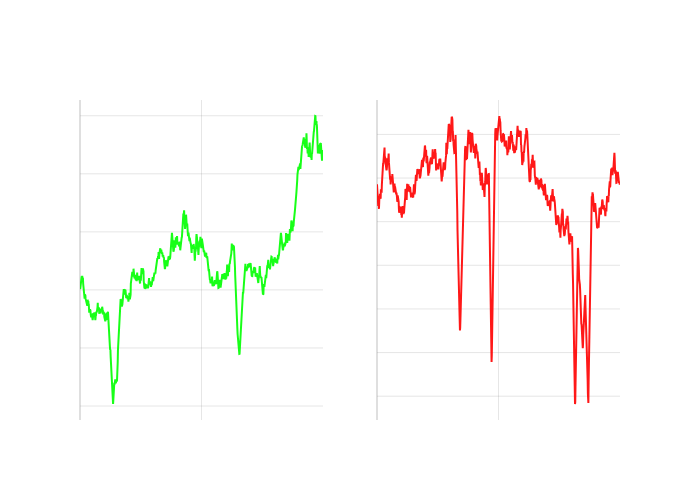

In [65]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set random seed for reproducibility
np.random.seed(42)

# Generate time points
n_points = 1000
t = np.linspace(0, 1, n_points)

# Generate stochastic wealth paths with drawdowns
def generate_wealth_path(n_drawdowns, drawdown_severity):
    # Create stochastic upward trend with random noise
    daily_returns = np.random.normal(0.0002, 0.01, n_points)
    wealth = 100 * np.exp(np.cumsum(daily_returns))
    
    # Add random drawdowns
    drawdown_points = np.random.choice(range(100, n_points-100), n_drawdowns, replace=False)
    for point in drawdown_points:
        # Create sharp drawdown
        width = np.random.randint(10, 30)
        depth = np.random.uniform(0.2, 0.4) * drawdown_severity
        
        # Apply drawdown
        window = np.arange(point-width, point+width)
        v_shape = 1 - depth * (1 - np.abs(np.linspace(-1, 1, 2*width)))
        wealth[window] *= v_shape
    
    return wealth

# Generate two wealth paths with different drawdown characteristics
wealth1 = generate_wealth_path(n_drawdowns=3, drawdown_severity=1.0)
wealth2 = generate_wealth_path(n_drawdowns=5, drawdown_severity=1.5)

# Create figure with secondary y-axis
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Trader A Performance', 'Trader B Performance'))

# Add traces
fig.add_trace(
    go.Scatter(
        x=t, 
        y=wealth1,
        name='Trader A',
        line=dict(color='rgba(0,255,0,0.9)', width=2)
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=t, 
        y=wealth2,
        name='Trader B',
        line=dict(color='rgba(255,0,0,0.9)', width=2)
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='Wealth Paths of Two Straddle Sellers',
    height=520,
    width=1300,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Update axes
for i in [1, 2]:
    fig.update_xaxes(
        title='Time',
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )
    fig.update_yaxes(
        title='Portfolio Value' if i==1 else None,
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        row=1, col=i
    )

fig.show("png")


Trader A does not naively sell volatility but rather considers a variety of factors from overall market temperature to current term structure of volatility

Trader B naively sells volatility because "there is edge historically" without paying attention to broader signals that could lead him to payout insurance

##### Effectively, Traders are Learning $\pi^* = \underset{\pi}{\text{argmax}} \; \mathbb{E}_{\pi}[R]$ where R is the Reward/Trade - Exactly What AI Agents Learn

<u>Trader A is continuously optimizing his policy $\pi$ which is a function of time and the environment leading him to make more informed decisions and accumulate more EV over time</u> 

<u>Trader B has no notion of EV and a policy $\pi$ and blindly follows "the strategy" that he read somewhere once online. . .</u>

###### ______________________________________________________________________________________________________________________________________

##### What the Pros CAN Teach You

Experienced players and agents can share general strategies for maximizing expected value by some policy function but they can not share a fixed set of rules that will always work

**Tips from the Pros for Poker & Trading**

1.) Tight Bankroll Management (Wealth Preservation is THE SINGLE MOST IMPORTANT IDEA)

2.) Understand Bet Sizing and Ergodic Theory - Edge is Nothing Without Effective Bettings

3.) Don't Play Every Hand, Don't Place a Trade to Place a Trade

4.) CUT LOSSES EARLY - if you raise with pocket aces and don't hit trips and the flop shows a flush **FOLD**

5.) Don't Play Emotional - Easier Said than Done, You Can't Recover Big Losses on Big Swings Back Up

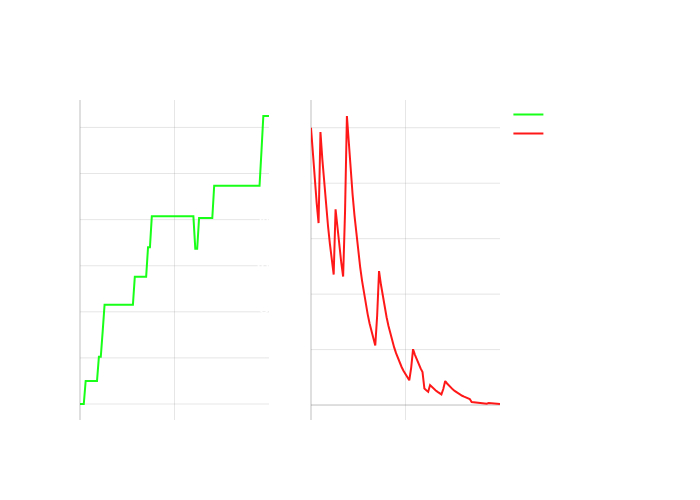

In [67]:
# Simulate two types of gamblers with different bankroll management
def simulate_gamblers(n_hands=100):
    # Track wealth paths 
    good_br_mgmt = [100]  # Good bankroll management
    bad_br_mgmt = [100]   # Poor bankroll management
    
    # Base bet size
    base_bet = 10
    
    for _ in range(n_hands):
        # Skip if either player is bankrupt
        if good_br_mgmt[-1] <= 0 and bad_br_mgmt[-1] <= 0:
            good_br_mgmt.append(0)
            bad_br_mgmt.append(0)
            continue
            
        deck = Deck()
        
        # Deal random hole cards to both players
        good_hole = deck.draw(2)
        bad_hole = deck.draw(2)
        
        # Deal 5 opponents
        villain_cards = []
        for _ in range(5):
            villain_cards.append(deck.draw(2))
            
        # Deal board
        board = deck.draw(5)
        
        # Evaluate hands
        good_score = evaluator.evaluate(board, good_hole)
        bad_score = evaluator.evaluate(board, bad_hole)
        villain_scores = [evaluator.evaluate(board, v_cards) for v_cards in villain_cards]
        
        # Calculate win probability - need to beat ALL villains
        good_win_prob = 1.0
        bad_win_prob = 1.0
        for v_score in villain_scores:
            if good_score > v_score:  # Lower score is better
                good_win_prob *= 0
            if bad_score > v_score:
                bad_win_prob *= 0
        
        # Good bankroll management: Bet 2-5% of bankroll when edge exists
        if good_br_mgmt[-1] > 0:
            if good_win_prob > 0.75:
                good_bet = good_br_mgmt[-1] * 0.05  # 5% when very confident
            elif good_win_prob > 0.5:
                good_bet = good_br_mgmt[-1] * 0.02  # 2% when confident
            else:
                good_bet = 0  # Don't bet if not confident
        else:
            good_bet = 0
            
        # Poor bankroll management: Bet 25-50% of bankroll regardless of edge
        if bad_br_mgmt[-1] > 0:
            if bad_win_prob > 0.75:
                bad_bet = bad_br_mgmt[-1] * 0.50  # 50% when very confident
            elif bad_win_prob > 0.5:
                bad_bet = bad_br_mgmt[-1] * 0.25  # 25% when confident
            else:
                bad_bet = bad_br_mgmt[-1] * 0.10  # Still bets 10% with no edge
        else:
            bad_bet = 0
        
        # Determine winners - need to beat ALL villains
        good_won = all(good_score < v_score for v_score in villain_scores)
        bad_won = all(bad_score < v_score for v_score in villain_scores)
        
        # Update wealth, ensuring it doesn't go below 0
        if good_bet > 0:
            new_good = max(0, good_br_mgmt[-1] + (good_bet if good_won else -good_bet))
            good_br_mgmt.append(new_good)
        else:
            good_br_mgmt.append(good_br_mgmt[-1])
            
        if bad_bet > 0:
            new_bad = max(0, bad_br_mgmt[-1] + (bad_bet if bad_won else -bad_bet))
            bad_br_mgmt.append(new_bad)
        else:
            bad_br_mgmt.append(bad_br_mgmt[-1])
        
    return good_br_mgmt, bad_br_mgmt

# Run simulation
good_wealth, bad_wealth = simulate_gamblers()

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Optimal Bankroll Policy', 
                   'Suboptimal Bankroll Policy'),
    horizontal_spacing=0.1
)

# Add wealth paths
fig.add_trace(
    go.Scatter(y=good_wealth, name='Good BR Management',
               line=dict(color='rgba(0,255,0,0.9)', width=2)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(y=bad_wealth, name='Poor BR Management',
               line=dict(color='rgba(255,0,0,0.9)', width=2)),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=600,
    width=1300,
    title='Experienced Players with Different Bankroll Management Policies',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    legend=dict(
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(255,255,255,0.2)'
    )
)

# Update axes
fig.update_xaxes(
    title='Number of Hands',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)
fig.update_yaxes(
    title='Account Balance ($)',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

fig.show("png")


##### This is Exactly the Same in Trading, You WILL NOT Catch Swings Back Up - It Is Statistically ALWAYS a Suboptimal Policy

Clearly, experience alone isn't enough - we just saw how bankroll management was critical to the overall edge or expected value of our strategy

What else improves your capacity to make optimal decisions in the face of uncertainty beyond experience?  

*Knowledge*
- Macroeconomics
- Behavioral Finance
- Politics
- Math, Probability, Statistics
- . . .

Understanding These Subjects and Being Able to Make Informed Decisions Is How You Aid in Optimizing EV - Knowledge is Necessary **NOT** Sufficient, Along with Experience

**The Knowledge & Experience Combination is Deadly**

*Model Informed Decision Making Dramatically Enhances Edge*

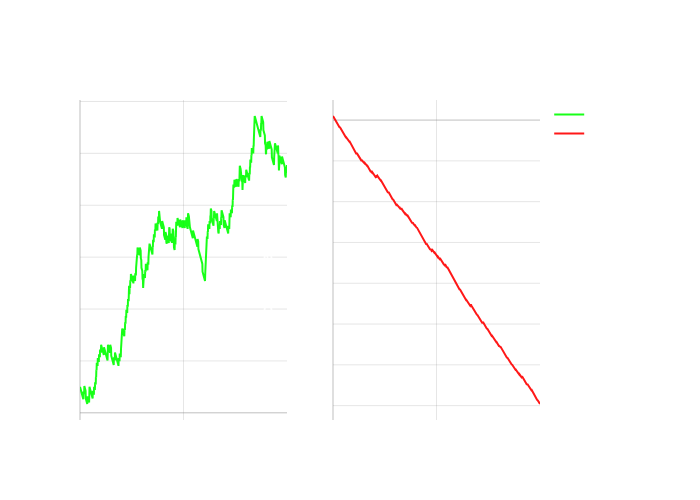

In [70]:
# Simulate two types of gamblers
def simulate_gamblers(n_hands=1000):
    # Track wealth paths
    smart_gambler = [100]  # Knows hand strength
    naive_gambler = [100]  # Always bets the same
    
    # Base bet size
    base_bet = 10
    
    for _ in range(n_hands):
        deck = Deck()
        
        # Deal random hole cards to both players
        smart_hole = deck.draw(2)
        naive_hole = deck.draw(2)
        
        # Deal 5 opponents
        villain_cards = []
        for _ in range(5):
            villain_cards.append(deck.draw(2))
            
        # Deal board
        board = deck.draw(5)
        
        # Evaluate hands
        smart_score = evaluator.evaluate(board, smart_hole)
        naive_score = evaluator.evaluate(board, naive_hole)
        villain_scores = [evaluator.evaluate(board, v_cards) for v_cards in villain_cards]
        
        # Smart gambler bets based on relative hand strength
        # Fix: Calculate win probability correctly - need to beat ALL villains
        smart_win_prob = 1.0  # Start with 100% chance
        for v_score in villain_scores:
            if smart_score > v_score:  # Note: lower score is better in evaluator
                smart_win_prob *= 0  # If we lose to any villain, probability goes to 0
        
        # Smart gambler only bets when win probability > 75% after river
        if smart_win_prob > 0.75:
            smart_bet = base_bet * 3  # 5x bet when very confident
        elif smart_win_prob > 0.5:
            smart_bet = base_bet * 2  # 2x bet when confident
        else:
            smart_bet = 3  # Don't bet if not confident
        
        # Naive gambler always bets the same
        naive_bet = base_bet
        
        # Determine winners - need to beat ALL villains
        smart_won = all(smart_score < v_score for v_score in villain_scores)
        naive_won = all(naive_score < v_score for v_score in villain_scores)
        
        # Update wealth
        if smart_bet > 0:  # Only update wealth if bet was placed
            smart_gambler.append(smart_gambler[-1] + (smart_bet if smart_won else -smart_bet))
        else:
            smart_gambler.append(smart_gambler[-1])  # Wealth unchanged if no bet
        naive_gambler.append(naive_gambler[-1] + (naive_bet if naive_won else -naive_bet))
        
    return smart_gambler, naive_gambler

# Run simulation
smart_wealth, naive_wealth = simulate_gamblers()

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Player Optimal Policy', 
                   'Player Suboptimal Policy'),
    horizontal_spacing=0.1
)

# Add wealth paths
fig.add_trace(
    go.Scatter(y=smart_wealth, name='Smart Gambler',
               line=dict(color='rgba(0,255,0,0.9)', width=2)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(y=naive_wealth, name='Naive Gambler',
               line=dict(color='rgba(255,0,0,0.9)', width=2)),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=600,
    width=1300,
    title='Wealth Paths of Optimal vs Suboptimal Policy Functions Over 1000 Hands',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    legend=dict(
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(255,255,255,0.2)'
    )
)

# Update axes
fig.update_xaxes(
    title='Number of Hands',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)
fig.update_yaxes(
    title='Account Balance ($)',
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)'
)

fig.show("png")


**Considerations**
- Functionally, market-making, quant trading, discretionary trading, . . ., are all different methods of optimizing EV
- There is a mathematical justification for each model - in a future video we will discuss these justifications
- Stability can persist even with *learned* experience - the time variant optimal policy should have persist, another topic for a future video